In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

from tensorflow.keras import layers, models
from scipy.io import loadmat
from keras.utils import to_categorical
import itertools

import warnings
warnings.simplefilter('ignore')

In [6]:
def load_mnist():
  mnist = loadmat("/content/drive/MyDrive/Machine Learning Specialization/MNIST digits classification dataset/mnist-original.mat/mnist-original.mat")
  mnist_data = mnist["data"].T
  mnist_data = mnist_data.reshape(len(mnist_data), 28, 28, 1)
  mnist_label = mnist["label"][0]
  count = len(set(mnist_label))
  return mnist_data, mnist_label, count, (28, 28, 1)

In [7]:
data, labels, classes_count, data_shape = load_mnist()
print("data shape: " + str(data.shape))
print("labels shape: " + str(labels.shape))
print("classes count: " + str(classes_count))

data shape: (70000, 28, 28, 1)
labels shape: (70000,)
classes count: 10


In [16]:
def plot_images_sample(X, Y):
    # Draw plot for images sample
    
    plt.figure(figsize=(28,28))
    rand_indicies = np.random.randint(len(X), size=10)
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)
        plt.xlabel(Y[index]) # raqamni aslini ko'rsatadi
    plt.show()

In [64]:
# def plot_images_sample(X, Y):
#     # Draw plot for images sample
    
#     plt.figure(figsize=(28,28))
#     rand_indicies = np.random.randint(len(X), size=20)
#     for i in range(20):
#         plt.plot(i)
#         plt.xticks([])
#         plt.yticks([])
#         plt.grid(False)
#         index = rand_indicies[i]
#         plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)
#         plt.xlabel(Y[index])
#         if not os.path.exists('/content/drive/MyDrive/Machine Learning Specialization/output_images'):
#             os.makedirs('/content/drive/MyDrive/Machine Learning Specialization/output_images')
#         plt.savefig('/content/drive/MyDrive/Machine Learning Specialization/output_images/({}){}.png'.format(i, Y[index]))         
#     plt.show()


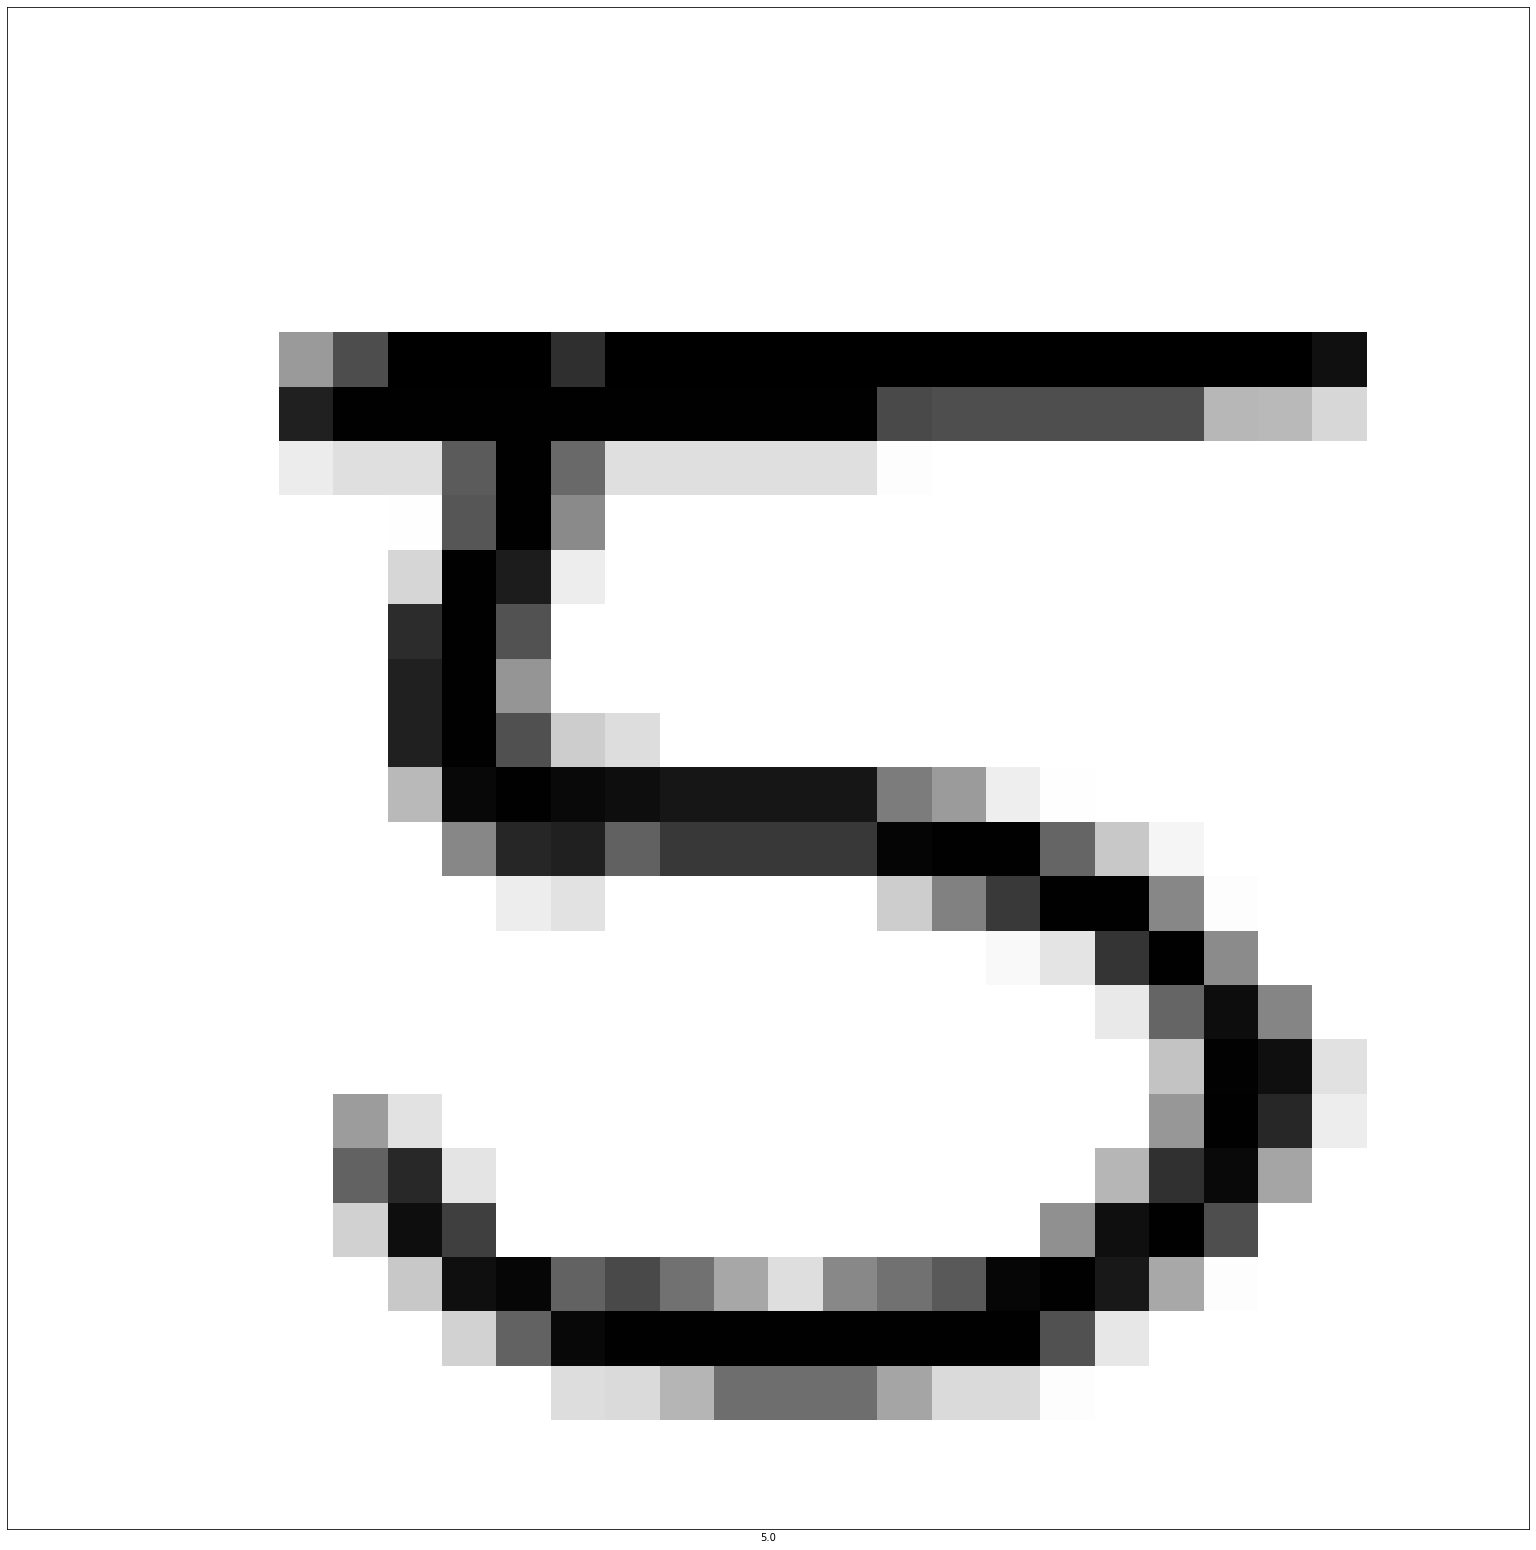

In [65]:
plot_images_sample(data, labels)

### Scaling data, splut and transform target to categorical

In [31]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, shuffle=True)

In [32]:
def fe_data(df, target):
    # FE: scaling data ant transform target to categorical
    df = df / 255.
    target = to_categorical(target)
    return df, target

In [33]:
X_train, Y_train = fe_data(x_train, y_train)
X_test, Y_test = fe_data(x_test, y_test)

### Model training

In [ ]:
model = models.Sequential()
model.add(Conv2D(64, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu', input_shape = data_shape))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(BatchNormalization()) 
model.add(Conv2D(256, kernel_size = (3, 3), strides = (1, 1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(BatchNormalization()) 
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(classes_count, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                     

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, Y_train, epochs = 5, validation_split = 0.2)

Epoch 1/5
1575/1575 [==============================] - 415s 263ms/step - loss: 0.0394 - accuracy: 0.9892 - val_loss: 0.0553 - val_accuracy: 0.9843
Epoch 2/5
1575/1575 [==============================] - 411s 261ms/step - loss: 0.0291 - accuracy: 0.9918 - val_loss: 0.0457 - val_accuracy: 0.9879
Epoch 3/5
1575/1575 [==============================] - 409s 260ms/step - loss: 0.0270 - accuracy: 0.9924 - val_loss: 0.0416 - val_accuracy: 0.9897
Epoch 4/5
1575/1575 [==============================] - 425s 270ms/step - loss: 0.0206 - accuracy: 0.9942 - val_loss: 0.0568 - val_accuracy: 0.9854
Epoch 5/5
1575/1575 [==============================] - 429s 273ms/step - loss: 0.0181 - accuracy: 0.9947 - val_loss: 0.0408 - val_accuracy: 0.9917


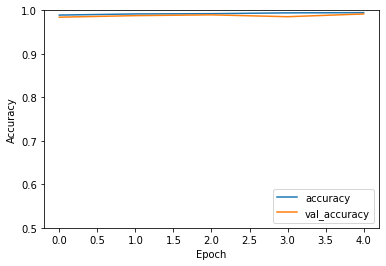

In [ ]:
# Draw plot for CNN training
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Print test prediction accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("test accuracy: " + str(test_acc))

219/219 - 12s - loss: 0.0434 - accuracy: 0.9906 - 12s/epoch - 56ms/step
test accuracy: 0.9905714392662048


In [ ]:
def get_predictions(X_test):
    # Digits prediction

    predictions = model.predict(X_test)    
    predictions = np.argmax(predictions, axis=1)
    
    return predictions

219/219 [==============================] - 13s 59ms/step


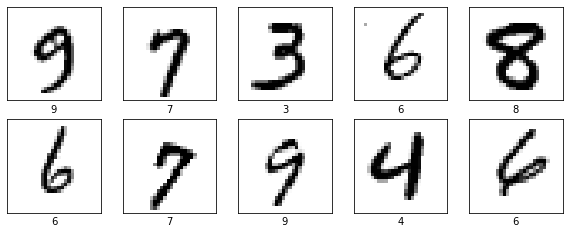

In [ ]:
# Prediction and display it
predictions = get_predictions(X_test)
plot_images_sample(X_test, predictions)

In [ ]:
def pred_wrong_display_MNIST_dataset(X_test, predictions, Y_test):
    # Displays misclassified digits from MNIST dataset
    
    X_test_wrong = []
    predictions_wrong = []
    Y_test_pred = []
    for i in range(len(X_test)):
        Y_test_pred.append(np.argmax(Y_test[i]))
        if predictions[i] != Y_test_pred[i]:
            #print(i, predictions[i], Y_test_pred[i])
            X_test_wrong.append(X_test[i])
            predictions_wrong.append(predictions[i])

    plot_images_sample(X_test_wrong, predictions_wrong)
        
    print('Accuracy is', round(accuracy_score(Y_test_pred, predictions),3))
    
    return Y_test_pred

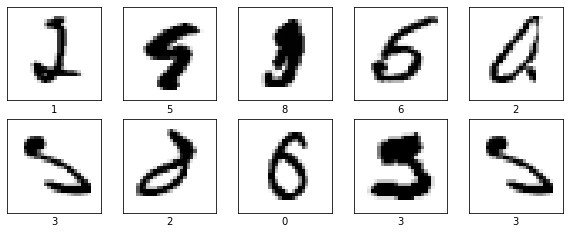

Accuracy is 0.991


In [ ]:
# Displays misclassified digits from MNIST
Y_test_pred = pred_wrong_display_MNIST_dataset(X_test, predictions, Y_test)

In [ ]:
model.save('/content/drive/MyDrive/Machine Learning Specialization/MNIST digits classification dataset/model')  

In [36]:
model_load = tf.keras.models.load_model('/content/drive/MyDrive/Machine Learning Specialization/MNIST digits classification dataset/model')

In [26]:
def get_predictions_load(X_test):
    # Digits prediction

    predictions = model_load.predict(X_test)    
    predictions = np.argmax(predictions, axis=1)
    
    return predictions

1/1 [==============================] - 0s 32ms/step


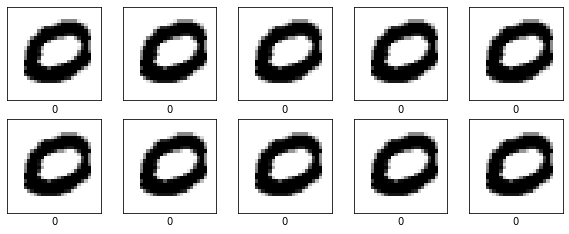

In [15]:
predictions = get_predictions_load(X_test[0:1])
plot_images_sample(X_test[0:1], predictions)  

In [39]:
def plot_images_sample_test(X, Y):
    # Draw plot for images sample
    plt.figure(figsize=(14,14))
    rand_indicies = np.random.randint(len(X), size=1)
    plt.plot(1)
    plt.xticks([])
    plt.yticks([])
    index = rand_indicies[0]
    plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)
    plt.xlabel(Y[index]) # raqamni aslini ko'rsatadi
    plt.show()

In [46]:
def plot_images_sample_test(X, Y):
      # Draw plot for images sample
    plt.figure(figsize=(14,14))
    rand_indicies = np.random.randint(len(X), size=1)
    plt.plot(1)
    plt.xticks([])
    plt.yticks([])
    index = rand_indicies[0]
    plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)
    plt.xlabel(Y[index])
    if not os.path.exists('/content/drive/MyDrive/Machine Learning Specialization/output_images'):
        os.makedirs('/content/drive/MyDrive/Machine Learning Specialization/output_images')
    plt.savefig('/content/drive/MyDrive/Machine Learning Specialization/output_images/{}.png'.format(Y[index]))

1/1 [==============================] - 0s 27ms/step


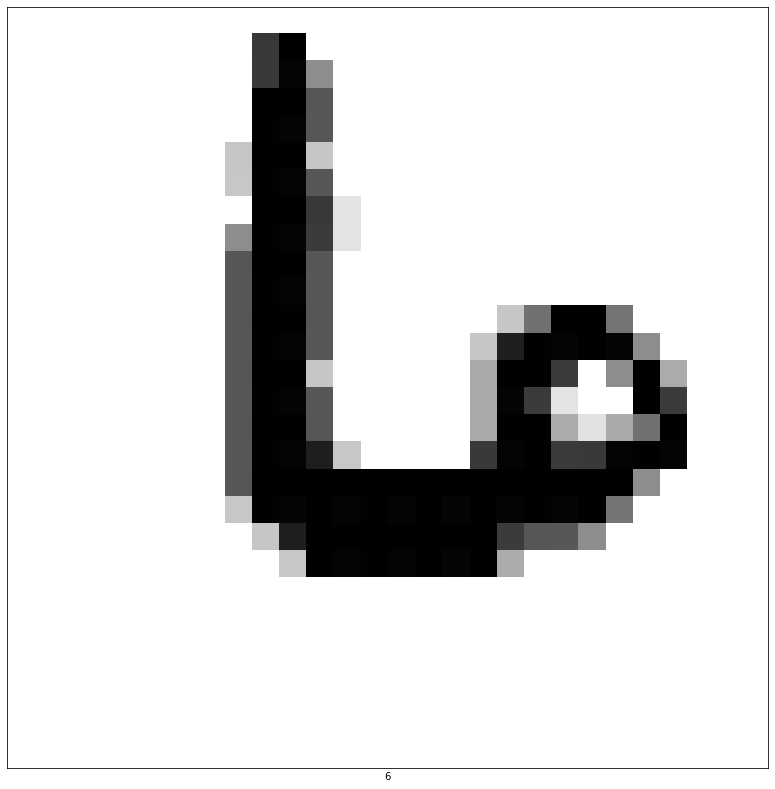

In [47]:
predictions = get_predictions_load(X_test[12:13])
# predictions[0]
plot_images_sample_test(X_test[12:13], predictions) 

## To Flip White and Black channels 

In [66]:
import matplotlib.image as img
import cv2

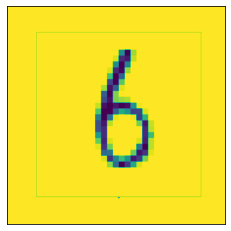

In [91]:
rasm = cv2.imread('/content/drive/MyDrive/Machine Learning Specialization/output_images/(3)6.0.png')
rasm = cv2.cvtColor(rasm, cv2.COLOR_BGR2GRAY)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(rasm)
plt.show()

In [92]:
rasm2 = np.copy(rasm)

In [93]:
maska = [np.zeros((2016, 2016)) for i in range(3)]

In [94]:
maska = np.array(maska)

In [95]:
maska = maska.T

In [96]:
rasm2, b = cv2.threshold(rasm2, 240,255, cv2.THRESH_BINARY)

In [97]:
maska[b == 0] = [255, 255, 255]

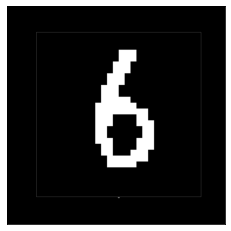

In [99]:
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(maska)
plt.savefig('/content/drive/MyDrive/Machine Learning Specialization/output_images/tort.png')